In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the Databases

We will use five datas frames with the reference years between 2017 and 2021. In the initial analyses, we noticed some differences in the number of questions that were used to collect data from the samples. In order to work with consistent data for the comparison of the previous period and the event of the Covid-19 pandemic, the common issues were filtered to continue the other procedures


In [ ]:
df_2017 = pd.read_csv('/content/OSMI_2017_Mental_Health_in_Tech_Survey.csv')
df_2018 = pd.read_csv('/content/OSMI_2018_Mental_Health_in_Tech_Survey.csv')
df_2019 = pd.read_csv('/content/OSMI_2019_Mental_Health_in_Tech_Survey_Results_-_OSMI_Mental_Health_in_Tech_Survey_2019.csv')
df_2020 = pd.read_csv('/content/OSMI_2020_Mental_Health_in_Tech_Survey_Results_.csv')
df_2021 = pd.read_csv('/content/OSMI_2021_Mental_Health_in_Tech_Survey_Results_.csv')


In [ ]:
##from google.colab import drive
##drive.mount('/content/drive')

In [ ]:
print("In the 2017 DF, the total number of responses were:", df_2017.shape[0],".And the number of questions:",df_2017.shape[1])
print("In the 2018 DF, the total number of responses were:", df_2018.shape[0],".And the number of questions:",df_2018.shape[1])
print("In the 2019 DF, the total number of responses were:", df_2019.shape[0],".And the number of questions:",df_2019.shape[1])
print("In the 2020 DF, the total number of responses were:", df_2020.shape[0],".And the number of questions:",df_2020.shape[1])
print("In the 2021 DF, the total number of responses were:", df_2021.shape[0],".And the number of questions:",df_2021.shape[1])

In the 2017 DF, the total number of responses were: 756 .And the number of questions: 123
In the 2018 DF, the total number of responses were: 417 .And the number of questions: 123
In the 2019 DF, the total number of responses were: 352 .And the number of questions: 82
In the 2020 DF, the total number of responses were: 180 .And the number of questions: 120
In the 2021 DF, the total number of responses were: 131 .And the number of questions: 124


In [ ]:
all_columns_no_filter = df_2017.columns
print(all_columns_no_filter)


Index(['#', '<strong>Are you self-employed?</strong>',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       ...
       'What is your gender?', 'What country do you <strong>live</strong> in?',
       'What US state or t

In [ ]:
df_2017.head()

,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,Other.3,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?,Start Date (UTC),Submit Date (UTC),Network ID
0,e49fe87572831232dcfa51b376b22039,0,100-500,1.0,1.0,No,Yes,No,I don't know,I don't know,...,Female,United Kingdom,NaN,NaN,NaN,United Kingdom,NaN,2018-05-16 12:32:04,2018-05-16 12:42:40,464b7a12f1
1,a1eede444ac024928d247a8372d54931,0,100-500,1.0,1.0,Yes,Yes,No,No,I don't know,...,male,United Kingdom,NaN,NaN,NaN,United Kingdom,NaN,2018-05-16 12:31:13,2018-05-16 12:40:40,464b7a12f1
2,37d3fd67f62bd1e0a2dea4f9cd440d98,0,6-25,1.0,1.0,I don't know,No,I don't know,No,Yes,...,male,United States of America,Missouri,White,NaN,United States of America,Missouri,2018-05-09 05:34:05,2018-05-09 05:46:04,1eb7e0cb94
3,519b759442c1cab0e9b5a8a1acb1b216,0,More than 1000,1.0,1.0,Yes,Yes,I don't know,I don't know,Yes,...,Male,United States of America,Washington,White,NaN,United States of America,Washington,2018-05-04 23:19:14,2018-05-04 23:23:23,63852edbc4
4,ef0af4927b575b1a3e607c11ca37870e,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,female,United States of America,Illinois,More than one of the above,NaN,United States of America,Illinois,2018-05-03 00:40:24,2018-05-03 00:53:20,43237889f1


#Treating the Data

As we are working with a database with a high number of columns (questions), we decided to reduce the number of columns we will work with by selecting only those that appear in the original 5 databases.

In [ ]:
# Adding a year tag
def add_year_column(df,year):
  df['year'] = year

In [ ]:
add_year_column(df_2017,2017)
add_year_column(df_2018,2018)
add_year_column(df_2019,2019)
add_year_column(df_2020,2020)
add_year_column(df_2021,2021)

### Filtering the columns
In addition, we apply a second filter to the columns. We are only selecting columns that have a fill above 80%.

Some columns are the same for all databases, but have different tokens in each database. To deal with this, we had to remove these markers.

In [ ]:
# Only columns with 80% filled answers are valid
def filter_columns(df, p=0.2):
  valid_columns = df.isna().sum() <= p * df.shape[0]
  return df.loc[:,valid_columns]

**Retrieving information we consider to be important**

In [ ]:
column1 = 'Do you believe your productivity is ever affected by a mental health issue?'
column2 = 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'
retrieved1_2017 = df_2017[column1]
retrieved2_2017 = df_2017[column2]
retrieved1_2018 = df_2018[column1]
retrieved2_2018 = df_2018[column2]
retrieved1_2019 = df_2019[column1]
retrieved2_2019 = df_2019[column2]
retrieved1_2020 = df_2020[column1]
retrieved2_2020 = df_2020[column2]
retrieved1_2021 = df_2021[column1]
retrieved2_2021 = df_2021[column2]

In [ ]:
df_2017 = filter_columns(df_2017)
df_2018 = filter_columns(df_2018)
df_2019 = filter_columns(df_2019)
df_2020 = filter_columns(df_2020)
df_2021 = filter_columns(df_2021)

In [ ]:
df_2017 = pd.concat([df_2017, retrieved1_2017, retrieved2_2017], axis=1)
df_2018 = pd.concat([df_2018, retrieved1_2018, retrieved2_2018], axis=1)
df_2019 = pd.concat([df_2019, retrieved1_2019, retrieved2_2019], axis=1)
df_2020 = pd.concat([df_2020, retrieved1_2020, retrieved2_2020], axis=1)
df_2021 = pd.concat([df_2021, retrieved1_2021, retrieved2_2021], axis=1)

In [ ]:
df_2019.columns

Index(['Unnamed: 0',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
       'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
   

In [ ]:
def correct_columns_names(df, rToken, sToken):
  df.columns = df.columns.str.replace(rToken, sToken)

In [ ]:
#arrumar as perguntas
correct_columns_names(df_2017, '*', '')
correct_columns_names(df_2017, '<strong>', '')
correct_columns_names(df_2017, '</strong>', '')

correct_columns_names(df_2018, '*', '')
correct_columns_names(df_2018, '<strong>', '')
correct_columns_names(df_2018, '</strong>', '')

correct_columns_names(df_2019, '*', '')
correct_columns_names(df_2019, '<strong>', '')
correct_columns_names(df_2019, '</strong>', '')

correct_columns_names(df_2020, '*', '')
correct_columns_names(df_2020, '<strong>', '')
correct_columns_names(df_2020, '</strong>', '')

correct_columns_names(df_2021, '*', '')
correct_columns_names(df_2021, '<strong>', '')
correct_columns_names(df_2021, '</strong>', '')

<ipython-input-13-2354355cfadc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(rToken, sToken)
<ipython-input-13-2354355cfadc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(rToken, sToken)
<ipython-input-13-2354355cfadc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(rToken, sToken)
<ipython-input-13-2354355cfadc>:2: FutureWarning: The default value of regex will change from True to False in a future version

After all this process, we reduced the number of columns in our databases to 33.




In [ ]:
commun_columns = df_2017.columns.intersection(df_2018.columns)
commun_columns = df_2019.columns.intersection(commun_columns)
commun_columns = df_2020.columns.intersection(commun_columns)
commun_columns = df_2021.columns.intersection(commun_columns)
len(commun_columns)

34

###Merging the data frames

We will deal with two data frames, one pre-pandemic (***pre_df***) and one during the pandemic (**during_df**).

In [ ]:
pre_df = pd.concat([df_2017[commun_columns], df_2018[commun_columns]])
pre_df = pd.concat([pre_df, df_2019[commun_columns]])
during_df = pd.concat([df_2020[commun_columns], df_2021[commun_columns]])

In [ ]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 0 to 351
Data columns (total 34 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                          --------------  -----  
 0   How many employees does your company or organization have?                                                                                      1308 non-null   object 
 1   Is your employer primarily a tech company/organization?                                                                                         1308 non-null   object 
 2   Is your primary role within your company related to tech/IT?                                                                                    1308 non-null   object 
 3   Has your employer ever f

In [ ]:
during_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 130
Data columns (total 34 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                          --------------  -----  
 0   How many employees does your company or organization have?                                                                                      269 non-null    object 
 1   Is your employer primarily a tech company/organization?                                                                                         269 non-null    float64
 2   Is your primary role within your company related to tech/IT?                                                                                    269 non-null    float64
 3   Has your employer ever fo

#Exploratory Analysis


###Viewing our Data

In [ ]:
print(pre_df.shape)
pre_df.head()



(1525, 34)


,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,...,Are you openly identified at work as a person with a mental health issue?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,"Overall, how well do you think the tech industry supports employees with mental health issues?",What is your age?,What is your gender?,What country do you live in?,What country do you work in?,year,Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"
0,100-500,1.0,1.0,No,I don't know,I don't know,I don't know,Same level of comfort for each,Yes,0.0,...,0.0,"Yes, I experienced",1.0,27.0,Female,United Kingdom,United Kingdom,2017,NaN,NaN
1,100-500,1.0,1.0,No,No,I don't know,I don't know,Same level of comfort for each,Maybe,0.0,...,0.0,"Yes, I observed",2.0,31.0,male,United Kingdom,United Kingdom,2017,NaN,NaN
2,6-25,1.0,1.0,I don't know,No,Yes,Difficult,Same level of comfort for each,Yes,1.0,...,1.0,"Yes, I experienced",1.0,36.0,male,United States of America,United States of America,2017,NaN,NaN
3,More than 1000,1.0,1.0,I don't know,I don't know,Yes,Difficult,Same level of comfort for each,Yes,1.0,...,0.0,Maybe/Not sure,2.0,22.0,Male,United States of America,United States of America,2017,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,No,1.0,52.0,female,United States of America,United States of America,2017,Yes,1-25%


In [ ]:
print(during_df.shape)
during_df.head()


(311, 34)


,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,...,Are you openly identified at work as a person with a mental health issue?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,"Overall, how well do you think the tech industry supports employees with mental health issues?",What is your age?,What is your gender?,What country do you live in?,What country do you work in?,year,Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,Maybe/Not sure,2,45,Male,United States of America,United States of America,2020,Yes,1-25%
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,"Yes, I observed",5,24,female,Russia,Russia,2020,Yes,1-25%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,"Yes, I experienced",1,46,Male,India,India,2020,Yes,76-100%
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,No,1,25,Female,Canada,Canada,2020,Yes,1-25%
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,"Yes, I observed",3,25,F,Canada,Canada,2020,Yes,26-50%


In [ ]:
pre_df.columns

Index(['How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
       'Would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
       'Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
       'Have y

## First observations

**Total age distribution**

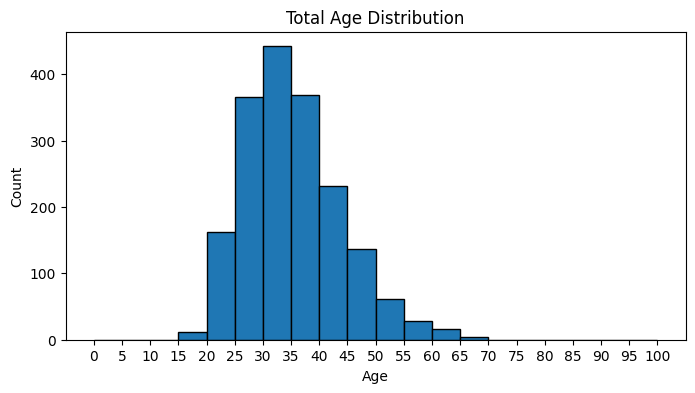

In [ ]:
# Concatenating the 'What is your age?' columns from pre-pandemic and during-pandemic dataframes
age_data = pd.concat([pre_df['What is your age?'], during_df['What is your age?']])

# Converting age data to numeric values (assuming it contains numerical values)
age_data = pd.to_numeric(age_data, errors='coerce')

# Removing missing or invalid values
age_data = age_data.dropna()

# Filtering ages over or equal to 18
age_data = age_data[age_data >= 18]

# Defining the range of values with intervals of 10
bin_range = np.arange(0, min(age_data.max(), 100) + 5, 5)

# Plotting the histogram
plt.figure(figsize=(8, 4))
plt.hist(age_data, bins=bin_range, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Total Age Distribution')
plt.xticks(bin_range)
plt.show()


**Age distribution by period**

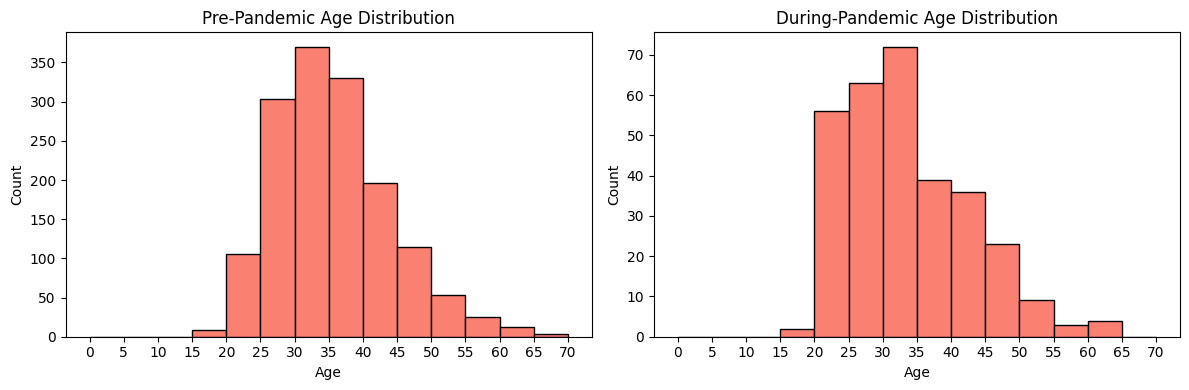

In [ ]:
# Extracting the 'What is your age?' column from the pre-pandemic dataframe and from the during-pandemic dataframe
age_data_pre = pre_df['What is your age?']
age_data_dur = during_df['What is your age?']

# Converting age data to numeric values (assuming it contains numerical values)
age_data_pre = pd.to_numeric(age_data_pre, errors='coerce')
age_data_dur = pd.to_numeric(age_data_dur, errors='coerce')

# Removing missing or invalid values
age_data_pre = age_data_pre.dropna()
age_data_dur = age_data_dur.dropna()

# Filtering ages over or equal to 18
age_data_pre = age_data_pre[age_data_pre >= 18]
age_data_dur = age_data_dur[age_data_dur >= 18]

# Defining the range of values with intervals of 10
bin_range = np.arange(0, min(age_data_pre.max(), age_data_dur.max(), 100) + 5, 5)

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotting the histogram for pre-pandemic period
axes[0].hist(age_data_pre, bins=bin_range, edgecolor='black', color='salmon')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].set_title('Pre-Pandemic Age Distribution')
axes[0].set_xticks(bin_range)

# Plotting the histogram for during-pandemic period
axes[1].hist(age_data_dur, bins=bin_range, edgecolor='black', color='salmon')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].set_title('During-Pandemic Age Distribution')
axes[1].set_xticks(bin_range)

# Adjusting spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()



### --------

<Figure size 15000x15000 with 0 Axes>

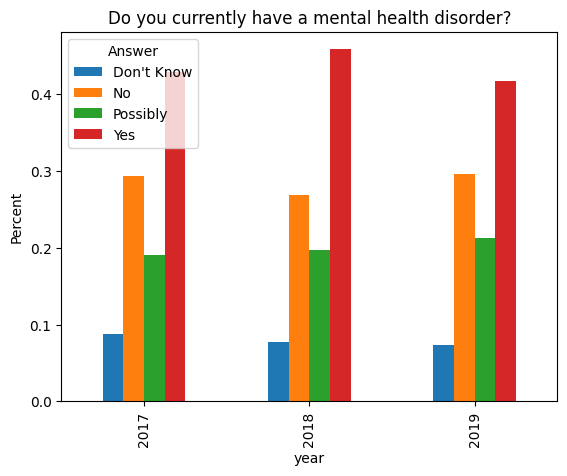

<Figure size 15000x15000 with 0 Axes>

In [ ]:
# Selecting the 'Do you currently have a mental health disorder?' and 'year' columns from the pre_df DataFrame
tmp = pre_df[['Do you currently have a mental health disorder?', 'year']]

# Grouping the data by 'year' and counting the occurrences of each answer for 'Do you currently have a mental health disorder?'
# Calculating the percentage of each answer using normalize=True
pre_mental_health = tmp.groupby('year')['Do you currently have a mental health disorder?'].value_counts(normalize=True).unstack()

# Creating a bar plot using the pre_mental_health DataFrame
pre_mental_health.plot(kind='bar')

# Setting the title and labels for the plot
plt.title('Do you currently have a mental health disorder?')
plt.ylabel('Percent')
plt.legend(title='Answer', loc='upper left')

# Setting the figure size
plt.figure(figsize=(150, 150))


<Figure size 15000x15000 with 0 Axes>

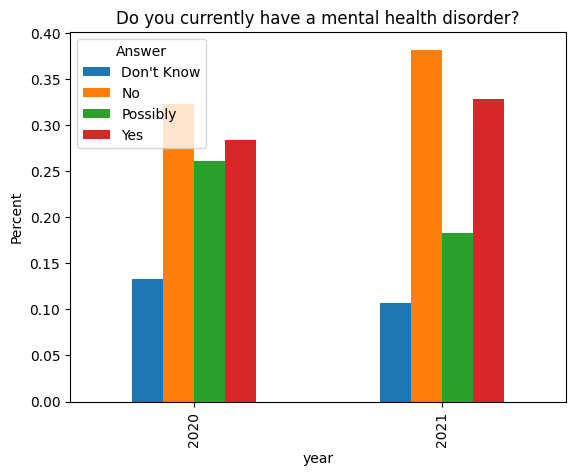

<Figure size 15000x15000 with 0 Axes>

In [ ]:
# Selecting the 'Do you currently have a mental health disorder?' and 'year' columns from the during_df DataFrame
tmp = during_df[['Do you currently have a mental health disorder?', 'year']]

# Grouping the data by 'year' and counting the occurrences of each answer for 'Do you currently have a mental health disorder?'
# Calculating the percentage of each answer using normalize=True
dur_mental_health = tmp.groupby('year' )['Do you currently have a mental health disorder?'].value_counts(normalize=True).unstack()
dur_mental_health.plot(kind='bar')

# Setting the title, labels and size of the plot
plt.title('Do you currently have a mental health disorder?')
plt.ylabel('Percent')
plt.legend(title='Answer', loc='upper left')
plt.figure(figsize=(150, 150))

<Figure size 15000x15000 with 0 Axes>

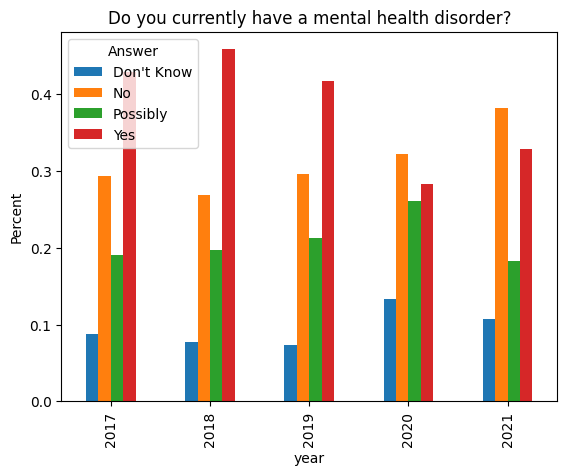

<Figure size 15000x15000 with 0 Axes>

In [ ]:
# Concatenating the pre_mental_health and dur_mental_health DataFrames
complete_mental_health = pd.concat([pre_mental_health, dur_mental_health])

# Creating a bar plot using the complete_mental_health DataFrame
complete_mental_health.plot(kind='bar')

# Setting the title, labels and size of the plot
plt.title('Do you currently have a mental health disorder?')
plt.ylabel('Percent')
plt.legend(title='Answer', loc='upper left')
plt.figure(figsize=(150, 150))

**Total gender distribution**

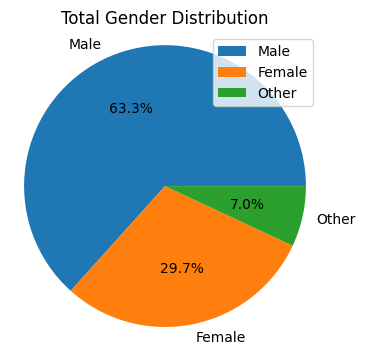

In [ ]:
# Extracting the "What is your gender?" column from the data frame
gender_data = pd.concat([pre_df['What is your gender?'], during_df['What is your gender?']])

# Cleaning and mapping gender values to standard categories
gender_data = gender_data.dropna().str.lower().str.strip()
gender_data = gender_data.replace(['female', 'f', 'woman', 'cis woman'], 'Female')
gender_data = gender_data.replace(['male', 'm', 'man', 'cis man'], 'Male')

# Counting the occurrences of each gender category
gender_counts = gender_data.value_counts()

# Determining the threshold for grouping other genders
threshold = 0.01      # Any gender category with an occurrence
                      # below this threshold will be grouped
                      # into the 'Other' category.

# Grouping other genders with low occurrence into 'Other' category
other_genders = gender_counts[gender_counts < threshold * gender_data.shape[0]].index
gender_counts['Other'] = gender_counts[other_genders].sum()
gender_counts = gender_counts.drop(other_genders)

# Plotting the pie chart
labels = ['Male', 'Female', 'Other']
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Total Gender Distribution')
plt.axis('equal')
plt.legend(labels, loc="upper right")
plt.show()

**Gender distribution by period**

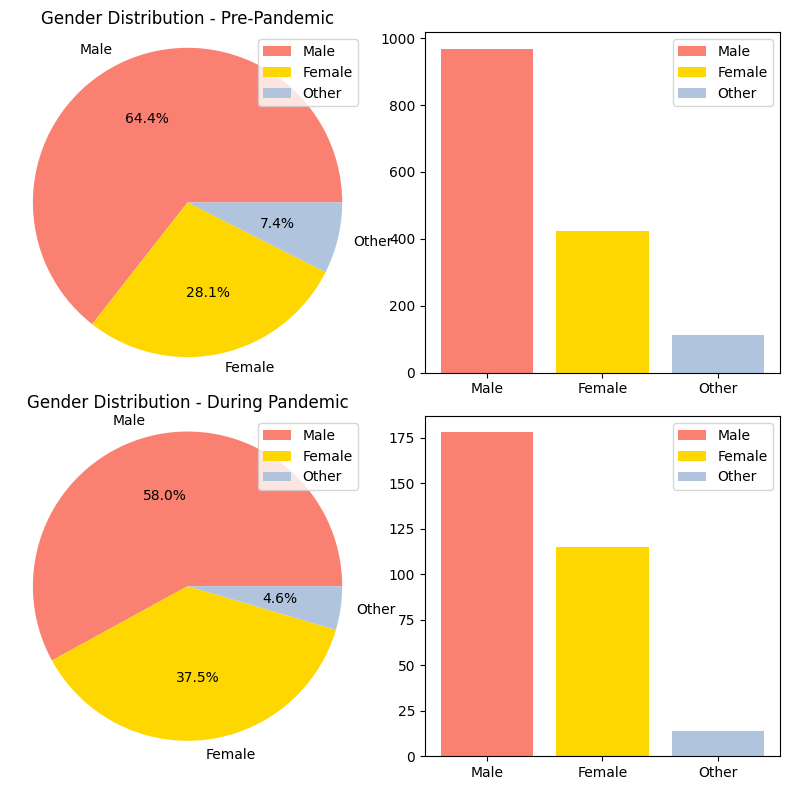

In [ ]:
# Extracting the "What is your gender?" column from the data frame for pre-pandemic and during-pandemic periods
pre_gender_data = pre_df['What is your gender?']
during_gender_data = during_df['What is your gender?']

# Cleaning and mapping gender values to standard categories for pre-pandemic and during-pandemic periods
pre_gender_data = pre_gender_data.dropna().str.lower().str.strip()
pre_gender_data = pre_gender_data.replace(['female', 'f', 'woman', 'cis woman'], 'Female')
pre_gender_data = pre_gender_data.replace(['male', 'm', 'man', 'cis man'], 'Male')

during_gender_data = during_gender_data.dropna().str.lower().str.strip()
during_gender_data = during_gender_data.replace(['female', 'f', 'woman', 'cis woman'], 'Female')
during_gender_data = during_gender_data.replace(['male', 'm', 'man', 'cis man'], 'Male')

# Grouping the gender data by period and counting the occurrences of each gender category
pre_gender_counts = pre_gender_data.value_counts()
during_gender_counts = during_gender_data.value_counts()

# Determining the threshold for grouping other genders
threshold = 0.01

# Grouping other genders with low occurrence into 'Other' category for pre-pandemic period
pre_other_genders = pre_gender_counts[pre_gender_counts < threshold * pre_gender_data.shape[0]].index
pre_gender_counts['Other'] = pre_gender_counts[pre_other_genders].sum()
pre_gender_counts = pre_gender_counts.drop(pre_other_genders)

# Grouping other genders with low occurrence into 'Other' category for during-pandemic period
during_other_genders = during_gender_counts[during_gender_counts < threshold * during_gender_data.shape[0]].index
during_gender_counts['Other'] = during_gender_counts[during_other_genders].sum()
during_gender_counts = during_gender_counts.drop(during_other_genders)

labels = ['Male', 'Female', 'Other']

fig, axs = plt.subplots(2, 2, figsize=(8,8))

# Plotting the pie chart for pre-pandemic period
axs[0, 0].pie(pre_gender_counts, labels=pre_gender_counts.index, autopct='%1.1f%%',  colors=['salmon', 'gold', 'lightsteelblue'])
axs[0,0].set_title('Gender Distribution - Pre-Pandemic')
axs[0,0].axis('equal')
axs[0,0].legend(labels, loc="upper right")


axs[0,1].bar(labels, pre_gender_counts, label=pre_gender_counts.index, color = ['salmon', 'gold', 'lightsteelblue'])
axs[0,1].legend(loc='upper right')


# Plot the pie chart for during-pandemic period
axs[1,0].pie(during_gender_counts, labels=during_gender_counts.index, autopct='%1.1f%%', colors=['salmon', 'gold', 'lightsteelblue'])
axs[1,0].set_title('Gender Distribution - During Pandemic')
axs[1,0].axis('equal')
axs[1,0].legend(labels, loc="upper right")

axs[1,1].bar(labels, during_gender_counts, label=during_gender_counts.index, color = ['salmon', 'gold', 'lightsteelblue'])
axs[1,1].legend(loc='upper right')

plt.subplots_adjust(left=0.1, right=0.9, bottom=1.8, top=2, wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

**Question: Overall, how much importance does your employer place on mental health?**

5.130637636080871
4.778393351800554
4.878289473684211
5.2387096774193544
5.350877192982456


<Figure size 1000x1500 with 0 Axes>

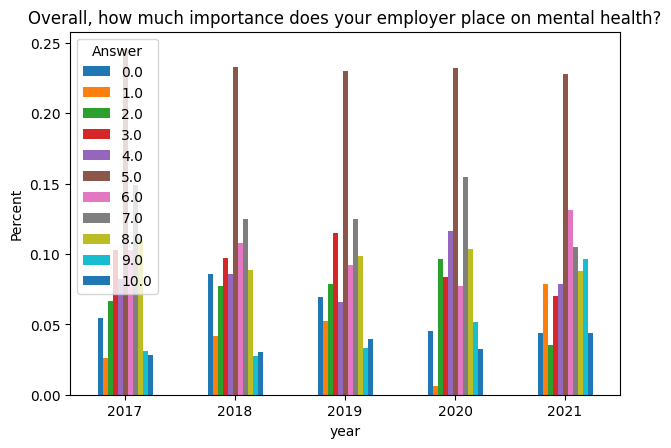

<Figure size 1000x1500 with 0 Axes>

In [ ]:
tmp_d = during_df[['Overall, how much importance does your employer place on mental health?', 'year']]
tmp_pre = pre_df[['Overall, how much importance does your employer place on mental health?', 'year']]

tmp_all = pd.concat([tmp_d, tmp_pre])

# only_2020 = tmp.query('year == 2020')
mean_2017 = tmp_all.query('year == 2017')['Overall, how much importance does your employer place on mental health?'].mean()
mean_2018 = tmp_all.query('year == 2018')['Overall, how much importance does your employer place on mental health?'].mean()
mean_2019 = tmp_all.query('year == 2019')['Overall, how much importance does your employer place on mental health?'].mean()
mean_2020 = tmp_all.query('year == 2020')['Overall, how much importance does your employer place on mental health?'].mean()
mean_2021 = tmp_all.query('year == 2021')['Overall, how much importance does your employer place on mental health?'].mean()

print(mean_2017)
print(mean_2018)
print(mean_2019)
print(mean_2020)
print(mean_2021)

dur_mental_health = tmp_all.groupby('year' )['Overall, how much importance does your employer place on mental health?'].value_counts(normalize=True).unstack()
dur_mental_health.plot(kind='bar')

# Setting the title, labels and size of the plot

plt.title('Overall, how much importance does your employer place on mental health?')
plt.ylabel('Percent')
plt.legend(title='Answer', loc='upper left')
plt.tight_layout()
plt.xticks(rotation='horizontal')
plt.figure(figsize=(10,15))

**Question: Do you believe your productivity is ever affected by a mental health issue?**

<Figure size 15000x15000 with 0 Axes>

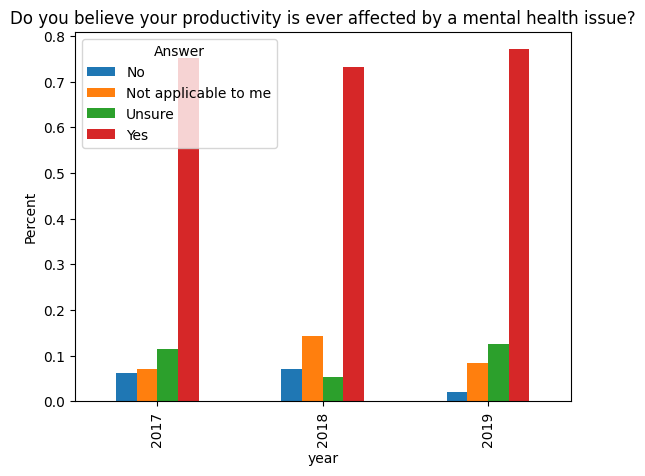

<Figure size 15000x15000 with 0 Axes>

In [ ]:
tmp_pre = pre_df[['Do you believe your productivity is ever affected by a mental health issue?', 'year']]
tmp_pre = tmp_pre.dropna()

pre_productivity = tmp_pre.groupby('year')['Do you believe your productivity is ever affected by a mental health issue?'].value_counts(normalize=True).unstack()

pre_productivity.plot(kind='bar')

plt.title('Do you believe your productivity is ever affected by a mental health issue?')
plt.ylabel('Percent')
plt.legend(title='Answer', loc='upper left')

plt.figure(figsize=(150,150))

<Figure size 15000x15000 with 0 Axes>

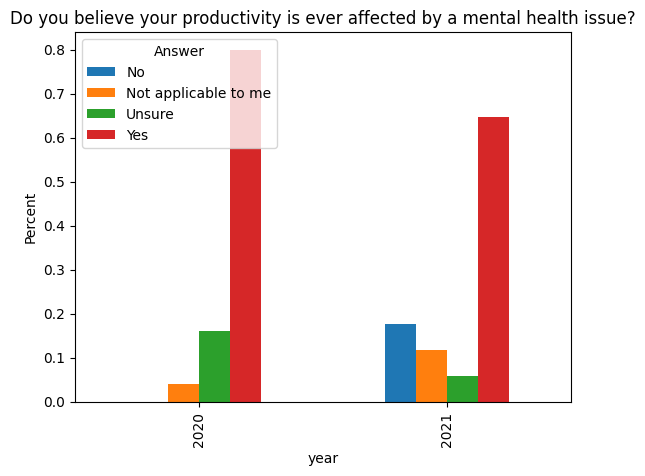

<Figure size 15000x15000 with 0 Axes>

In [ ]:
tmp_dur = during_df[['Do you believe your productivity is ever affected by a mental health issue?', 'year']]
tmp_dur = tmp_dur.dropna()

dur_productivity = tmp_dur.groupby('year')['Do you believe your productivity is ever affected by a mental health issue?'].value_counts(normalize=True).unstack()

dur_productivity.plot(kind='bar')

plt.title('Do you believe your productivity is ever affected by a mental health issue?')
plt.ylabel('Percent')
plt.legend(title='Answer', loc='upper left')

plt.figure(figsize=(150,150))

**Question: If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?**

<Figure size 15000x15000 with 0 Axes>

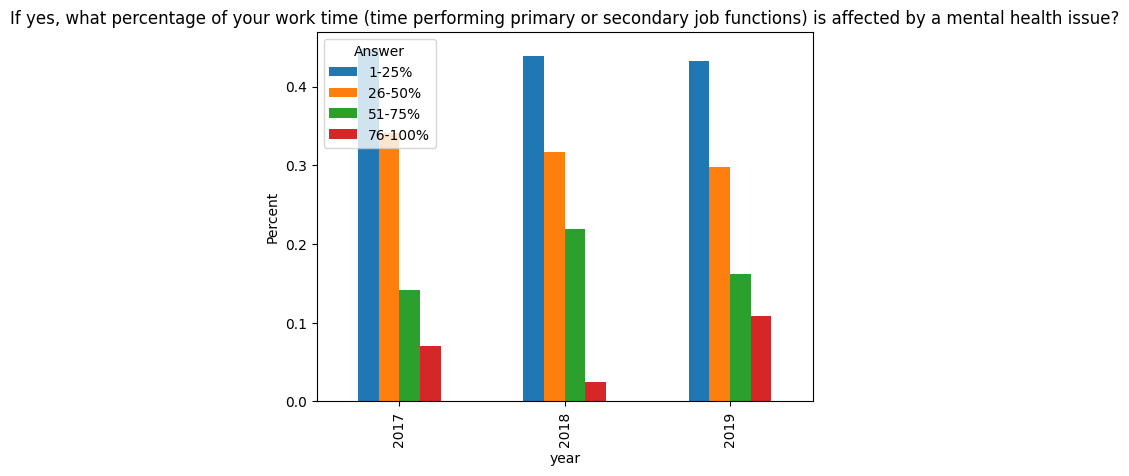

<Figure size 15000x15000 with 0 Axes>

In [ ]:
pre_filtered = pre_df[['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?', 'year']]
pre_filtered = pre_filtered.dropna()

pre_group = pre_filtered.groupby('year')['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'].value_counts(normalize=True).unstack()

pre_group.plot(kind='bar')

plt.title('If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?')
plt.ylabel('Percent')
plt.legend(title='Answer', loc='upper left')

plt.figure(figsize=(150,150))


<Figure size 15000x15000 with 0 Axes>

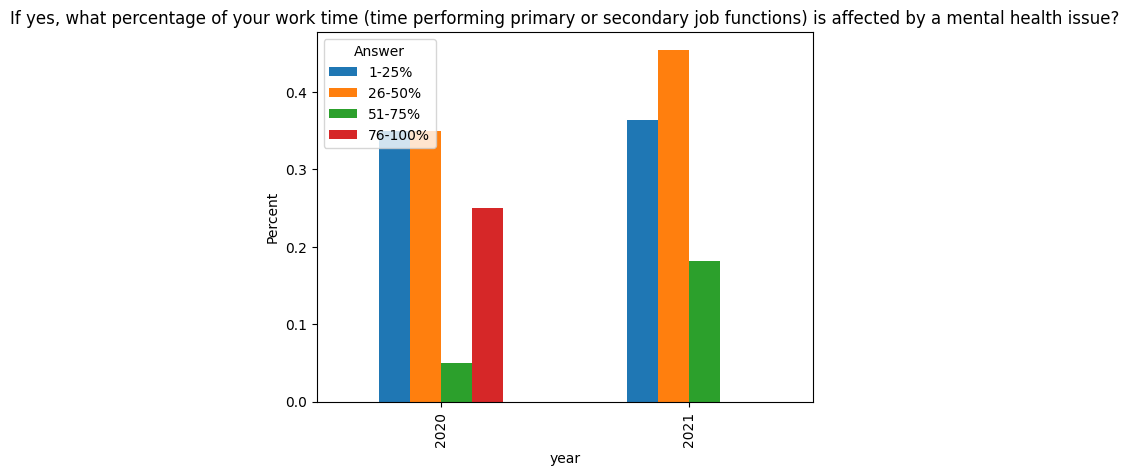

<Figure size 15000x15000 with 0 Axes>

In [ ]:
dur_filtered = during_df[['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?', 'year']]
dur_filtered = dur_filtered.dropna()

dur_group = dur_filtered.groupby('year')['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'].value_counts(normalize=True).unstack()

dur_group.plot(kind='bar')

plt.title('If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?')
plt.ylabel('Percent')
plt.legend(title='Answer', loc='upper left')

plt.figure(figsize=(150,150))

In [ ]:
dur_filtered[dur_filtered['year']== 2021]

,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",year
9,26-50%,2021
46,26-50%,2021
69,1-25%,2021
74,1-25%,2021
75,26-50%,2021
81,51-75%,2021
87,26-50%,2021
91,1-25%,2021
125,26-50%,2021
128,1-25%,2021


**Question: If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?**

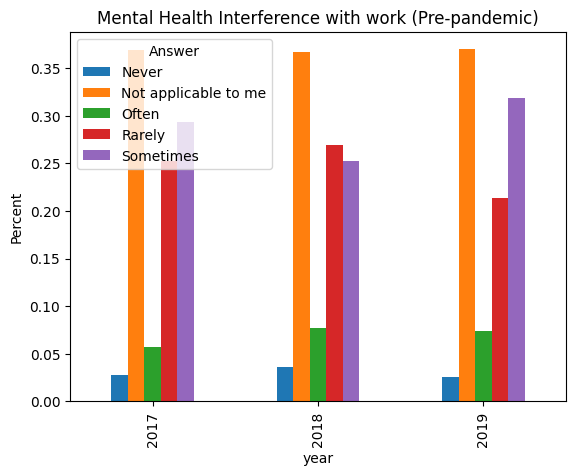

In [ ]:
# Selecting the desired columns from the pre_df DataFrame
pre_tmp = pre_df[['If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?', 'year']]

# Grouping the data by 'year' and counting the occurrences of each answer for the selected column
pre_interference = pre_tmp.groupby('year')['If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?'].value_counts(normalize=True).unstack()

# Creating a bar plot for pre-pandemic data
pre_interference.plot(kind='bar')

# Setting the title and labels for the plot
plt.title('Mental Health Interference with work (Pre-pandemic)')
plt.ylabel('Percent')
plt.legend(title='Answer', loc='upper left')


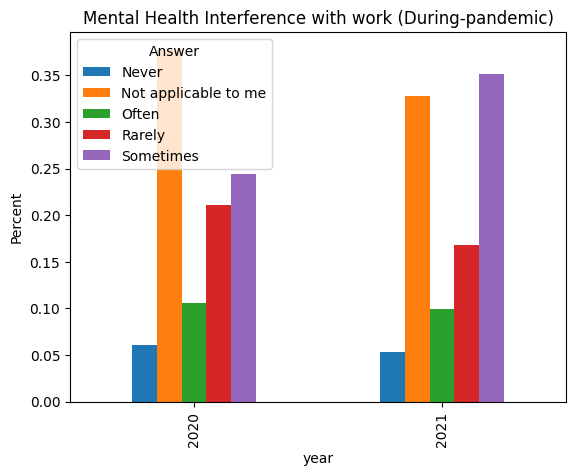

In [ ]:
# Selecting the desired columns from the during_df DataFrame
during_tmp = during_df[['If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?', 'year']]

# Grouping the data by 'year' and counting the occurrences of each answer for the selected column
during_interference = during_tmp.groupby('year')['If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?'].value_counts(normalize=True).unstack()

# Creating a bar plot for post-pandemic data
during_interference.plot(kind='bar')

# Setting the title and labels for the plot
plt.title('Mental Health Interference with work (During-pandemic)')
plt.ylabel('Percent')
plt.legend(title='Answer', loc='upper left')

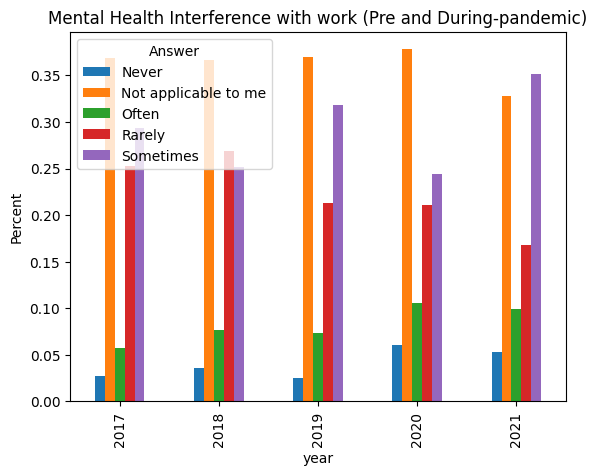

In [ ]:
# Concatenating the pre_interference and post_interference DataFrames
complete_interference = pd.concat([pre_interference, during_interference])

# Creating a bar plot using the complete_interference DataFrame
complete_interference.plot(kind='bar')

# Setting the title, labels, and size of the plot
plt.title('Mental Health Interference with work (Pre and During-pandemic)')
plt.ylabel('Percent')
plt.legend(title='Answer', loc='upper left')

# Displaying the plot
plt.show()

**Question: Overall, how well do you think the tech industry supports employees with mental health issues?**

2.5344827586206895
2.5251798561151078
2.602272727272727
2.7111111111111112
2.6717557251908395


<Figure size 1000x1500 with 0 Axes>

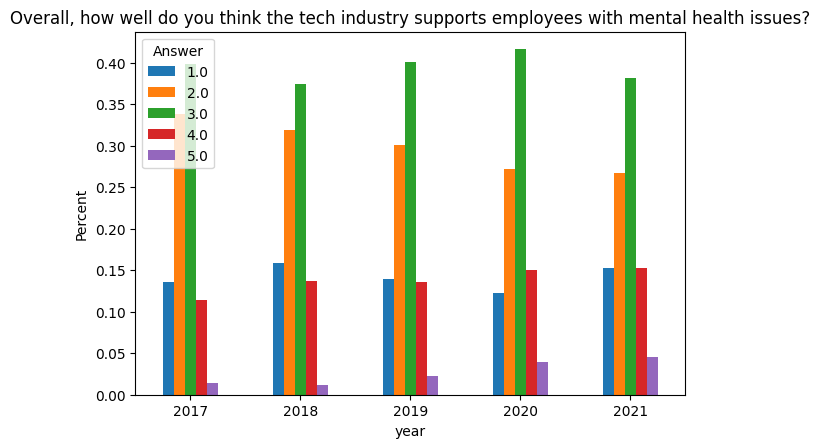

<Figure size 1000x1500 with 0 Axes>

In [ ]:
# Selecting the 'Do you currently have a mental health disorder?' and 'year' columns from the during_df DataFrame
tmp_d = during_df[['Overall, how well do you think the tech industry supports employees with mental health issues?', 'year']]
tmp_pre = pre_df[['Overall, how well do you think the tech industry supports employees with mental health issues?', 'year']]

tmp_all = pd.concat([tmp_d, tmp_pre])

# only_2020 = tmp.query('year == 2020')
mean_2017 = tmp_all.query('year == 2017')['Overall, how well do you think the tech industry supports employees with mental health issues?'].mean()
mean_2018 = tmp_all.query('year == 2018')['Overall, how well do you think the tech industry supports employees with mental health issues?'].mean()
mean_2019 = tmp_all.query('year == 2019')['Overall, how well do you think the tech industry supports employees with mental health issues?'].mean()
mean_2020 = tmp_all.query('year == 2020')['Overall, how well do you think the tech industry supports employees with mental health issues?'].mean()
mean_2021 = tmp_all.query('year == 2021')['Overall, how well do you think the tech industry supports employees with mental health issues?'].mean()

print(mean_2017)
print(mean_2018)
print(mean_2019)
print(mean_2020)
print(mean_2021)

# Grouping the data by 'year' and counting the occurrences of each answer for 'Do you currently have a mental health disorder?'
# Calculating the percentage of each answer using normalize=True
dur_mental_health = tmp_all.groupby('year' )['Overall, how well do you think the tech industry supports employees with mental health issues?'].value_counts(normalize=True).unstack()
dur_mental_health.plot(kind='bar')

# Setting the title, labels and size of the plot

plt.title('Overall, how well do you think the tech industry supports employees with mental health issues?')
plt.ylabel('Percent')
plt.legend(title='Answer', loc='upper left')
plt.tight_layout()
plt.xticks(rotation='horizontal')
plt.figure(figsize=(10,15))